In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats



input_file_dir = "C:/Users/sherm/Desktop/workspace/LikeLion_Mid_team_14/data/raw/"
output_file_dir = "C:/Users/sherm/Desktop/workspace/LikeLion_Mid_team_14/data/processed/"

In [2]:
pd.read_excel(output_file_dir+"지역별음주사고15~24.xlsx")

,시도,시군구,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,서울,합계,3453,2874,2864,2856,2190,2327,2059,2348,1938,1576
1,서울,합계,3453,2874,2864,2856,2190,879,771,851,677,613
2,서울,합계,3453,2874,2864,2856,2190,4495,4003,4205,3688,3098
3,서울,종로구,68,77,70,63,48,47,45,56,52,36
4,서울,중구,57,51,39,70,30,49,43,45,37,30
...,...,...,...,...,...,...,...,...,...,...,...,...
72,경기,군포시,78,55,63,59,30,54,50,47,40,33
73,경기,남양주시,228,226,206,212,164,215,181,143,131,133
74,경기,오산시,128,92,107,133,89,89,89,84,79,64
75,경기,의왕시,77,48,51,60,40,48,36,50,27,31


### 경찰청 운전면허 행정 처분 현황

In [66]:
temp_2023=pd.read_csv(input_file_dir + "경찰청_운전면허 행정처분 현황_20231231.csv", encoding="euc-kr")
#temp_10_18=pd.read_csv(input_file_dir + "경찰청_운전면허 행정처분 현황_2010~2018.csv", encoding="euc-kr")

In [68]:
temp_10_18

,구분,운전면허 정지,적성검사미필 취소,점수초과 취소,행정처분 기간 중 운전 취소,교통사고 야기도주 취소,기타 취소
0,2010,330849,100862,157774,4540,7453,16075
1,2011,269624,77320,138059,3230,7008,15345
2,2012,157892,34501,131786,1701,7382,10552
3,2013,194774,25290,144146,2629,6195,15461
4,2014,209030,35300,137125,2412,5578,18866
5,2015,198714,40246,133060,2173,5468,22822
6,2016,211626,52943,126938,4480,4718,21188
7,2017,172879,47626,120591,3499,4178,23344
8,2018,73824,44852,101712,1253,4262,30613


In [13]:
year_drink=temp[['연도','음주운전 등 운전면허 정지']]

In [26]:
year_drink

,연도,음주운전 등 운전면허 정지
0,2010,330849
1,2011,269624
2,2012,157892
3,2013,194774
4,2014,209030
5,2015,198714
6,2016,211626
7,2017,172879
8,2018,73824
9,2019,54572


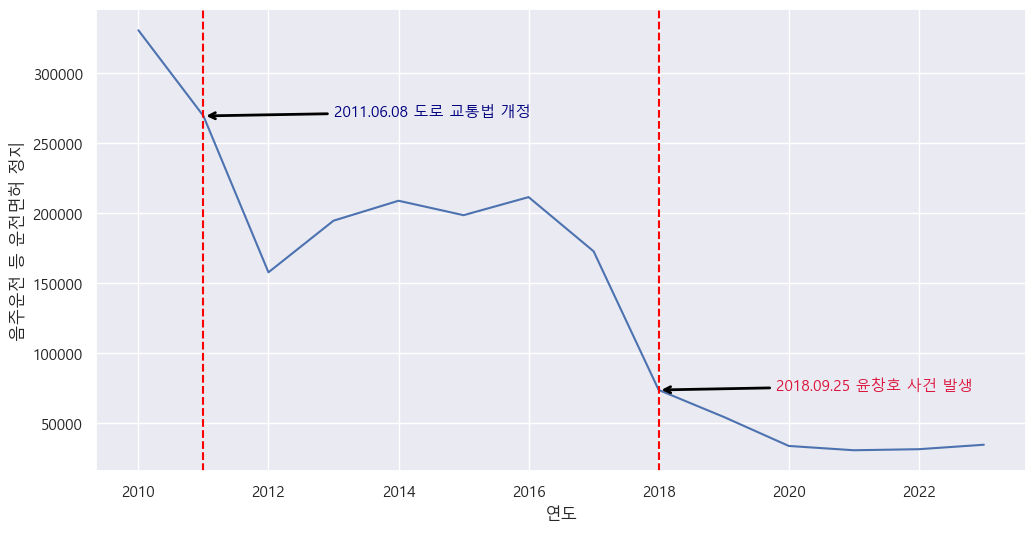

In [38]:
sns.lineplot(x="연도", y='음주운전 등 운전면허 정지', data=year_drink)
#2011년도 도로교통법 개정
plt.axvline(x=2011, color='red', linestyle='--')
plt.annotate(
    text='2011.06.08 도로 교통법 개정',
    xy=(2011, 269624),               # 실제 화살표가 가리킬 지점
    xytext=(2013, 269624),           # 텍스트가 위치할 지점
    arrowprops={
        "arrowstyle" : '->',
        "color" : 'black',
        "linewidth" : 2
    },
    fontsize=11,
    color='navy'
)

#2018
plt.axvline(x=2018, color='red', linestyle='--')
plt.annotate(
    text='2018.09.25 윤창호 사건 발생',
    xy=(2018, 73824),               # 실제 화살표가 가리킬 지점
    xytext=(2019.8, 73824),           # 텍스트가 위치할 지점
    arrowprops={
        "arrowstyle" : '->',
        "color" : 'black',
        "linewidth" : 2
    },
    fontsize=11,
    color='crimson'
)

plt.show()

### 재발률 확인

### 음주_교통사고

In [3]:
df_05_09=pd.read_csv(output_file_dir + "음주_교통사고_05-09.csv")
df_10_14=pd.read_csv(output_file_dir + "음주_교통사고_10-14.csv")
df_15_19=pd.read_csv(output_file_dir + "음주_교통사고_15-19.csv")
df_20_24=pd.read_csv(output_file_dir + "음주_교통사고_20-24.csv")

In [4]:
df_05_09_total=df_05_09[(df_05_09['시도'] != '합계') & (df_05_09['시군구'] == '합계')]
df_10_14_total=df_10_14[(df_10_14['시도'] != '합계') & (df_10_14['시군구'] == '합계')]
df_15_19_total=df_15_19[(df_15_19['시도'] != '합계') & (df_15_19['시군구'] == '합계')]
df_20_24_total=df_20_24[(df_20_24['시도'] != '합계') & (df_20_24['시군구'] == '합계')]

In [5]:
df_05_09_total=df_05_09_total[['시도','2005_사고[건]','2006_사고[건]','2007_사고[건]','2008_사고[건]','2009_사고[건]']]
df_10_14_total=df_10_14_total[['시도','2010_사고[건]','2011_사고[건]','2012_사고[건]','2013_사고[건]','2014_사고[건]']]
df_15_19_total=df_15_19_total[['시도','2015_사고[건]','2016_사고[건]','2017_사고[건]','2018_사고[건]','2019_사고[건]']]
df_20_24_total=df_20_24_total[['시도','2020_사고[건]','2021_사고[건]','2022_사고[건]','2023_사고[건]','2024_사고[건]']]

#### 전체 음주운전 사고수가 줄었을까?

In [6]:
df_05_09_total_all=df_05_09[(df_05_09['시도'] == '합계') & (df_05_09['시군구'] == '합계')]
df_10_14_total_all=df_10_14[(df_10_14['시도'] == '합계') & (df_10_14['시군구'] == '합계')]
df_15_19_total_all=df_15_19[(df_15_19['시도'] == '합계') & (df_15_19['시군구'] == '합계')]
df_20_24_total_all=df_20_24[(df_20_24['시도'] == '합계') & (df_20_24['시군구'] == '합계')]

In [7]:
df_05_09_total_all=df_05_09_total_all[['시도','2005_사고[건]','2006_사고[건]','2007_사고[건]','2008_사고[건]','2009_사고[건]']]
df_10_14_total_all=df_10_14_total_all[['시도','2010_사고[건]','2011_사고[건]','2012_사고[건]','2013_사고[건]','2014_사고[건]']]
df_15_19_total_all=df_15_19_total_all[['시도','2015_사고[건]','2016_사고[건]','2017_사고[건]','2018_사고[건]','2019_사고[건]']]
df_20_24_total_all=df_20_24_total_all[['시도','2020_사고[건]','2021_사고[건]','2022_사고[건]','2023_사고[건]','2024_사고[건]']]

In [8]:
df_total_all=df_05_09_total_all.set_index("시도").join(df_10_14_total_all.set_index('시도'))
df_total_all=df_total_all.join(df_15_19_total_all.set_index('시도'))
df_total_all=df_total_all.join(df_20_24_total_all.set_index('시도'))
df_total_all=df_total_all.reset_index() #인덱스 걸린걸 풀어줍니다

In [12]:
df_melted_all = df_total_all.melt(id_vars='시도', var_name='연도', value_name='사고건수') #시각화를 위한 변환
df_melted_all['연도'] = df_melted_all['연도'].str.extract(r'(\d{4})').astype(int)
df_melted_all=df_melted_all[['시도','연도','사고건수']] #합계는 굳이 필요 없으니깐 날려줍니다
df_melted_all['사고건수'] = df_melted_all['사고건수'].astype(int)
df_melted_all['연도'] = df_melted_all['연도'].astype(int)

df_melted_all

,시도,연도,사고건수
0,합계,2005,26460
1,합계,2006,29988
2,합계,2007,28415
3,합계,2008,26869
4,합계,2009,28204
5,합계,2010,28641
6,합계,2011,28460
7,합계,2012,29092
8,합계,2013,26589
9,합계,2014,24043


In [11]:
df_melted_all.to_csv(output_file_dir+'연도별 사고건수.csv')

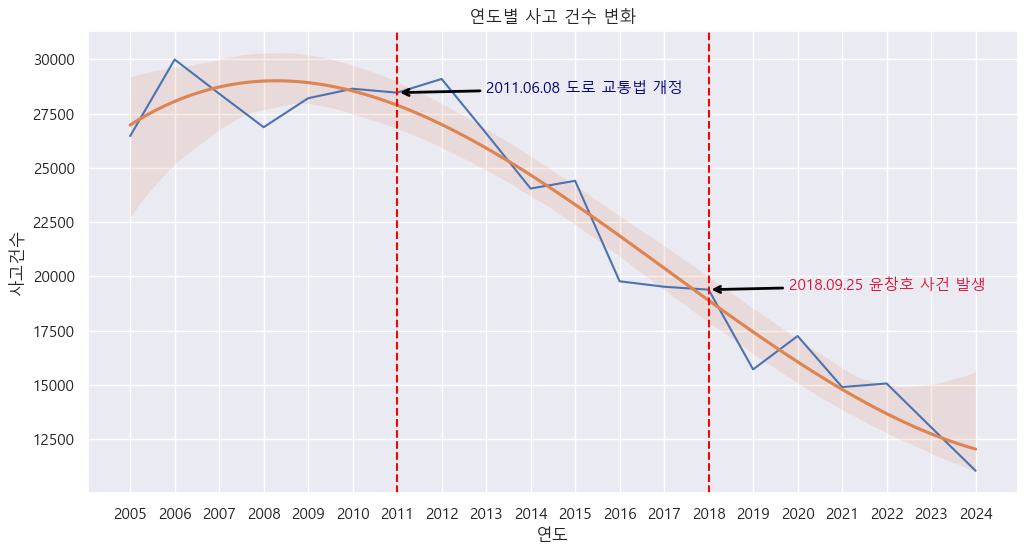

In [15]:
sns.lineplot(data=df_melted_all, x='연도', y='사고건수') #mainplot
#sns.regplot(data=df_melted_all, x='연도', y='사고건수', scatter=False, order=1) #추세선
#sns.regplot(data=df_melted_all, x='연도', y='사고건수', scatter=False, order=2) #추세선
sns.regplot(data=df_melted_all, x='연도', y='사고건수', scatter=False, order=3) #추세선
years=sorted(df_melted_all['연도'].unique()) #연도가 애매하게 끓겨나오는 것을 방지하기 위한
plt.xticks(ticks=years, labels=years)
plt.title('연도별 사고 건수 변화')

#2011년도 도로교통법 개정
plt.axvline(x=2011, color='red', linestyle='--')
plt.annotate(
    text='2011.06.08 도로 교통법 개정',
    xy=(2011, 28460),               # 실제 화살표가 가리킬 지점
    xytext=(2013, 28460),           # 텍스트가 위치할 지점
    arrowprops={
        "arrowstyle" : '->',
        "color" : 'black',
        "linewidth" : 2
    },
    fontsize=11,
    color='navy'
)

#2018
plt.axvline(x=2018, color='red', linestyle='--')
plt.annotate(
    text='2018.09.25 윤창호 사건 발생',
    xy=(2018, 19381),               # 실제 화살표가 가리킬 지점
    xytext=(2019.8, 19381),           # 텍스트가 위치할 지점
    arrowprops={
        "arrowstyle" : '->',
        "color" : 'black',
        "linewidth" : 2
    },
    fontsize=11,
    color='crimson'
)

#plt.gca().invert_yaxis()
plt.show()

### 정책의 영향을 확인하기 위한 ITS

In [155]:
df_melted_14_23 = df_melted_all[(df_melted_all['연도'] <= 2024) & (df_melted_all['연도'] >= 2014)]
#정책의 개입 여부 확인 (0이면 개입 전, 1이면 개입 이후)
df_melted_14_23['intervention'] = (df_melted_14_23['연도'] >= 2019).astype(int) 

#연도 흐름을 숫자 시계열로 표현
df_melted_14_23['time']=df_melted_14_23['연도'] - df_melted_14_23['연도'].min()

#정책 이후 변화량 확인
cut_point=df_melted_14_23[df_melted_14_23['intervention']==1]['time'].min()
df_melted_14_23['timeAfter'] = df_melted_14_23['time'] - cut_point
df_melted_14_23['timeAfter'] = df_melted_14_23['timeAfter'].apply(lambda x : x if x >= 0 else 0)
df_melted_14_23

C:\Users\sherm\AppData\Local\Temp\ipykernel_26864\50760670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted_14_23['intervention'] = (df_melted_14_23['연도'] >= 2019).astype(int)
C:\Users\sherm\AppData\Local\Temp\ipykernel_26864\50760670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted_14_23['time']=df_melted_14_23['연도'] - df_melted_14_23['연도'].min()
C:\Users\sherm\AppData\Local\Temp\ipykernel_26864\50760670.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,연도,사고건수,intervention,time,timeAfter
9,2014,24043,0,0,0
10,2015,24399,0,1,0
11,2016,19769,0,2,0
12,2017,19517,0,3,0
13,2018,19381,0,4,0
14,2019,15708,1,5,0
15,2020,17247,1,6,1
16,2021,14894,1,7,2
17,2022,15059,1,8,3
18,2023,13042,1,9,4


In [156]:
import statsmodels.formula.api as smf
model=smf.ols('사고건수 ~ time + intervention + timeAfter',data=df_melted_14_23).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   사고건수   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     34.78
Date:                Thu, 29 May 2025   Prob (F-statistic):           0.000142
Time:                        13:27:25   Log-Likelihood:                -91.768
No. Observations:                  11   AIC:                             191.5
Df Residuals:                       7   BIC:                             193.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.426e+04    986.556     24.594   

C:\Users\sherm\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [148]:
### 정책의 영향을 확인하기 위한 ITS
df_melted_13_22 = df_melted_all[(df_melted_all['연도'] <= 2022) & (df_melted_all['연도'] >= 2013)]
#정책의 개입 여부 확인 (0이면 개입 전, 1이면 개입 이후)
df_melted_13_22['intervention'] = (df_melted_13_22['연도'] >= 2018).astype(int) 

#연도 흐름을 숫자 시계열로 표현
df_melted_13_22['time']=df_melted_13_22['연도'] - df_melted_13_22['연도'].min()

#정책 이후 변화량 확인
cut_point=df_melted_13_22[df_melted_13_22['intervention']==1]['time'].min()
df_melted_13_22['timeAfter'] = df_melted_13_22['time'] - cut_point
df_melted_13_22['timeAfter'] = df_melted_13_22['timeAfter'].apply(lambda x : x if x >= 0 else 0)
df_melted_13_22

C:\Users\sherm\AppData\Local\Temp\ipykernel_26864\1680065873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted_13_22['intervention'] = (df_melted_13_22['연도'] >= 2018).astype(int)
C:\Users\sherm\AppData\Local\Temp\ipykernel_26864\1680065873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted_13_22['time']=df_melted_13_22['연도'] - df_melted_13_22['연도'].min()
C:\Users\sherm\AppData\Local\Temp\ipykernel_26864\1680065873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,연도,사고건수,intervention,time,timeAfter
8,2013,26589,0,0,0
9,2014,24043,0,1,0
10,2015,24399,0,2,0
11,2016,19769,0,3,0
12,2017,19517,0,4,0
13,2018,19381,1,5,0
14,2019,15708,1,6,1
15,2020,17247,1,7,2
16,2021,14894,1,8,3
17,2022,15059,1,9,4


In [149]:
model=smf.ols('사고건수 ~ time + intervention + timeAfter',data=df_melted_13_22).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   사고건수   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     30.09
Date:                Thu, 29 May 2025   Prob (F-statistic):           0.000517
Time:                        12:06:06   Log-Likelihood:                -83.098
No. Observations:                  10   AIC:                             174.2
Df Residuals:                       6   BIC:                             175.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.655e+04    983.256     26.999   

C:\Users\sherm\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [153]:
### 정책의 영향을 확인하기 위한 ITS
df_melted_06_16 = df_melted_all[(df_melted_all['연도'] <= 2016) & (df_melted_all['연도'] >= 2006)]
#정책의 개입 여부 확인 (0이면 개입 전, 1이면 개입 이후)
df_melted_06_16['intervention'] = (df_melted_06_16['연도'] >= 2011).astype(int) 

#연도 흐름을 숫자 시계열로 표현
df_melted_06_16['time']=df_melted_06_16['연도'] - df_melted_06_16['연도'].min()

#정책 이후 변화량 확인
cut_point=df_melted_06_16[df_melted_06_16['intervention']==1]['time'].min()
df_melted_06_16['timeAfter'] = df_melted_06_16['time'] - cut_point
df_melted_06_16['timeAfter'] = df_melted_06_16['timeAfter'].apply(lambda x : x if x >= 0 else 0)
df_melted_06_16

C:\Users\sherm\AppData\Local\Temp\ipykernel_26864\2937580862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted_06_16['intervention'] = (df_melted_06_16['연도'] >= 2011).astype(int)
C:\Users\sherm\AppData\Local\Temp\ipykernel_26864\2937580862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted_06_16['time']=df_melted_06_16['연도'] - df_melted_06_16['연도'].min()
C:\Users\sherm\AppData\Local\Temp\ipykernel_26864\2937580862.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,연도,사고건수,intervention,time,timeAfter
1,2006,29988,0,0,0
2,2007,28415,0,1,0
3,2008,26869,0,2,0
4,2009,28204,0,3,0
5,2010,28641,0,4,0
6,2011,28460,1,5,0
7,2012,29092,1,6,1
8,2013,26589,1,7,2
9,2014,24043,1,8,3
10,2015,24399,1,9,4


In [157]:
model=smf.ols('사고건수 ~ time + intervention + timeAfter',data=df_melted_06_16).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   사고건수   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     15.71
Date:                Thu, 29 May 2025   Prob (F-statistic):            0.00172
Time:                        13:33:11   Log-Likelihood:                -91.843
No. Observations:                  11   AIC:                             191.7
Df Residuals:                       7   BIC:                             193.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       2.9e+04    993.237     29.202   

C:\Users\sherm\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


### 결과 해석
- 윤창호법 자체는 정확히 어떤 효과를 보였는지는 알 수 없음
```text
  ================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.426e+04    986.556     24.594      0.000    2.19e+04    2.66e+04
time         -1420.6000    402.760     -3.527      0.010   -2372.975    -468.225
intervention  -104.6667   1622.982     -0.064      0.950   -3942.408    3733.075
timeAfter      397.6000    504.886      0.788      0.457    -796.266    1591.466
==============================================================================
```
- 이미 2011년 도로교통법이 개정 된 이후로 상당한 영향이 있었음이 확인
```text
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       2.9e+04    993.237     29.202      0.000    2.67e+04    3.14e+04
time          -290.5000    405.487     -0.716      0.497   -1249.325     668.325
intervention  2131.5286   1633.972      1.305      0.233   -1732.202    5995.259
timeAfter    **-1426.0714**    508.305     -2.806      0.026   -2628.022    -224.121
==============================================================================
```
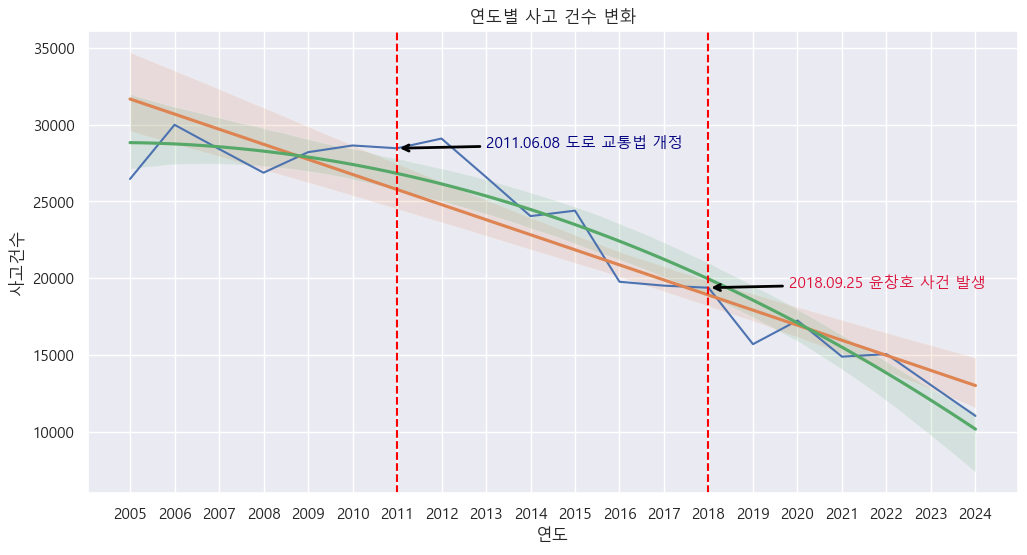

#### 각 도별로 교통사고 수가 줄었는지 시각화 해봅시다

In [61]:
df_total=df_05_09_total.set_index("시도").join(df_10_14_total.set_index('시도'))
df_total=df_total.join(df_15_19_total.set_index('시도'))
df_total=df_total.join(df_20_24_total.set_index('시도'))
df_total=df_total.reset_index() #인덱스 걸린걸 풀어줍니다

In [74]:
df_melted = df_total.melt(id_vars='시도', var_name='연도', value_name='사고건수') #시각화를 위한 변환
df_melted['연도'] = df_melted['연도'].str.extract(r'(\d{4})').astype(int)
df_melted

,시도,연도,사고건수
0,서울,2005,3510.0
1,부산,2005,1525.0
2,대구,2005,1531.0
3,인천,2005,1471.0
4,광주,2005,701.0
...,...,...,...
315,전북,2024,371
316,전남,2024,436
317,경북,2024,608
318,경남,2024,692


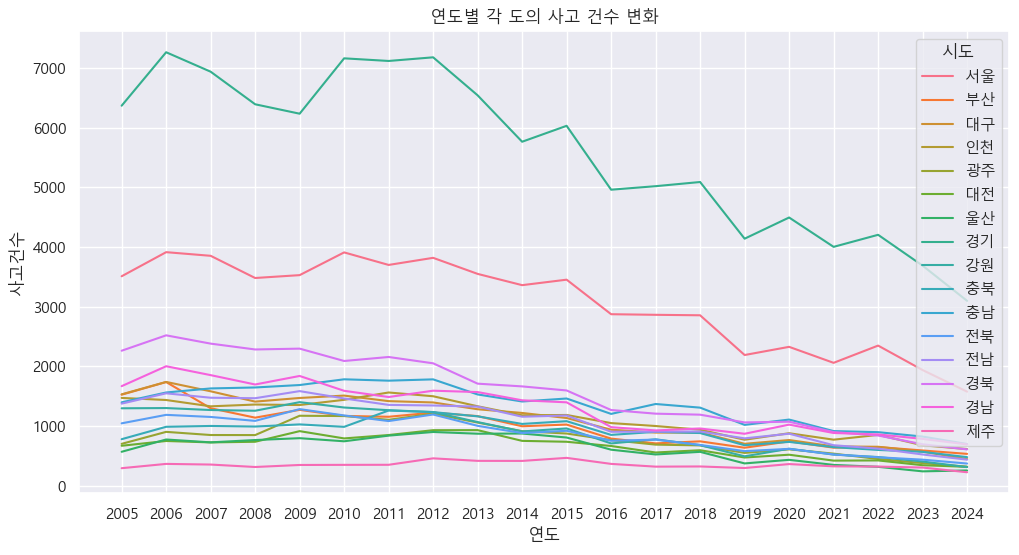

In [80]:
sns.lineplot(data=df_melted, x='연도', y='사고건수',hue='시도')
plt.gca().invert_yaxis()
years=sorted(df_melted['연도'].unique()) #연도가 애매하게 끓겨나오는 것을 방지하기 위한
plt.xticks(ticks=years, labels=years)
plt.title('연도별 각 도의 사고 건수 변화')

plt.show()

### 면허 취득 견과 년수별 음주 음전 사고 발생 건수 및 구성비
- 나이대가 없음 운전면허 비율에 대해서 나오는거라 되게 애매

In [60]:
df=pd.read_excel(input_file_dir + "면허취득경과년수별 음주운전사고 발생건수 및 구성비.xls")

In [61]:
df #

,연도,구분,전체,소계(5년미만),1년 미만,1~2년,2~3년,3~4년,4~5년,5~10년,10년 이상,기타
0,2005,건수,26460,8869.0,1735.0,1395.0,2100.0,1905.0,1734.0,6050.0,8521.0,3020.0
1,2005,비율,100,33.5,6.6,5.3,7.9,7.2,6.6,22.9,32.2,11.4
2,2006,건수,29990,10301.0,1993.0,1912.0,1663.0,1594.0,3139.0,6934.0,9402.0,3353.0
3,2006,비율,100,34.3,6.6,6.4,5.5,5.3,10.5,23.1,31.4,11.2
4,2007,건수,28416,8892.0,1695.0,1781.0,1622.0,1099.0,2695.0,7064.0,9103.0,3357.0
5,2007,비율,100,31.3,6.0,6.3,5.7,3.9,9.5,24.9,32.0,11.8
6,2008,건수,26873,7604.0,1653.0,1466.0,1490.0,1225.0,1770.0,7034.0,9130.0,3105.0
7,2008,비율,100,28.3,6.2,5.5,5.5,4.6,6.6,26.2,34.0,11.5
8,2009,건수,28207,7910.0,1862.0,1687.0,1358.0,1585.0,1413.0,7213.0,10329.0,2755.0
9,2009,비율,100,28.0,6.6,2.0,4.8,5.6,5.0,25.6,36.6,9.8


In [158]:
pd.read_excel(input_file_dir+'19세 이상 성인의 연간 음주운전 경험률.xls')

,연도,전체,남(성별),여(성별),19~29(연령별),30~39(연령별),40~49(연령별),50~59(연령별),60~69(연령별),70세이상(연령별)
0,2001,16.0,19.5,6.4,18.9,17.1,16.0,12.5,7.3,0.0
1,2005,18.8,24.2,6.9,14.3,21.9,22.8,18.1,15.2,16.9
2,2007,16.6,20.7,6.0,12.1,20.8,18.1,20.5,15.1,17.8
3,2008,18.5,23.2,6.4,14.8,16.9,20.5,20.3,19.2,24.0
4,2009,18.0,22.0,7.2,18.0,16.7,15.1,20.5,20.4,23.1
5,2010,19.1,23.8,7.8,15.1,16.7,19.7,22.1,20.2,18.8
6,2011,17.1,22.1,6.1,16.5,15.7,18.1,19.3,18.8,13.5
7,2012,15.0,18.3,7.9,12.6,15.1,15.3,17.0,17.9,13.3
8,2013,12.6,15.6,6.2,9.5,12.0,13.1,15.0,15.6,13.8
9,2014,11.0,14.0,5.5,6.9,10.9,14.9,11.8,11.8,8.7
